## Abstract
In this issue, we begin to learn the algorithm of dimension reduction.

As we know, dimension reduction is the best way to solve the problem of over fitting, in addition to increasing data and regularization.

In fact, the predecessors had encountered dimensional disasters earlier. We know that the volume of the $n $ dimensional sphere is
$$
CR^n
$$
Therefore, the ratio of the volume of the sphere to the $n$ dimensional hypercube is
<img src="https://latex.codecogs.com/svg.image?\lim_{n&space;\to&space;&plus;\infty}=\frac{CR^n}{2^n&space;R^n}=0" title="\lim_{n \to +\infty}=\frac{CR^n}{2^n R^n}=0" />
From the formula, we can see that in high-dimensional data, the distribution of samples is quite sparse, and the interior of hypercube is almost hollow, so it is more difficult to model the data. This is the so-called dimensional disaster.

The dimensionality reduction methods are divided into:
* Direct dimensionality reduction, feature selection
* Linear dimensionality reduction, $PCA$，$MDS$等
* Piecewise linear, manifolds include $Isomap$, $LLE$ etc.

## Idea

As for the core idea of $PCA$, the teacher summarized a line: one center, two basic points
* one center:
    * to transform each feature that may be linearly related into a set of linearly independent features via an orthogonal transformation.
    * That is, to reconstruct the original feature space.
* Two basic points:
    * Maximum Projection Variance
        * Make the data more dispersed in the reconstructed feature space (because the original data is clustered together and scattered in corners)
    * Minimum Reconfiguration Distance
        * to minimize the loss of information (i.e., fewer components of the complementary space) after the data has been reconstructed

## Algorithm
we'll mainly talk about the first basic point: maximum projection variance. In fact, the two basic points mean the same thing, but interpret a center from different angles.

Firstly,we are to review the projection. We have talked about projection before, and the same is true here. Let's assume sample $x_ i $, a base vector $u_ i $, assuming $u_ i^Tu_ i = 1 $, so you can get the projection of the sample in  this dimension $u_ i $ is
$$
project_i=x_i^Tu_i
$$
After orthogonal transformation, the sample originally has $p $ feature dimensions. Because we need to reduce the dimension, we only take the first $q $ features, and these $q $ features are linearly independent. Therefore, these projections can be directly added to obtain the projection of the sample in the new feature space.

Note that the data is centered before the projection, so the mean value of the data is changed to zero, and the variance of the projection can be squared directly.

To sum up, we get the objective function:
$$
J=\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{q}\left(\left(x_{i}-\bar{x}\right)^{T} u_{j}\right)^{2}
$$
The objective function is derived slightly below:

since the shape of $((x_i-\bar{x})^Tu_j)$ is $(1,p)* (p,1)=(1,1)$, therefore, it can be transposed:
$$
\begin{aligned}
J&=\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{q}\left(\left(x_{i}-\bar{x}\right)^{T} u_{j}\right)^{2}\\
&=\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{q}(u_{j}^T(x_{i}-\bar{x}))^{2}\\
&=\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{q}u_{j}^T(x_{i}-\bar{x}))(x_{i}-\bar{x})^T u_j\\
&=\sum_{j=1}^{q} u_{j}^T(\frac{1}{N} \sum_{i=1}^{N} (x_{i}-\bar{x}))(x_{i}-\bar{x})^T) u_j\\
&=\sum_{j=1}^q u_j^T S u_j\\
\end{aligned}
$$
Don't forget that we have another condition: $s.t\ u_j^T u_j=1$

So you can use Lagrange multiplier:
<img src="https://latex.codecogs.com/svg.image?\underset{u_{j}}{\operatorname{argmax}}&space;L\left(u_{j},&space;\lambda\right)=\underset{u_{j}}{\operatorname{argmax}}&space;u_{j}^{T}&space;S&space;u_{j}&plus;\lambda\left(1-u_{j}^{T}&space;u_{j}\right)" title="\underset{u_{j}}{\operatorname{argmax}} L\left(u_{j}, \lambda\right)=\underset{u_{j}}{\operatorname{argmax}} u_{j}^{T} S u_{j}+\lambda\left(1-u_{j}^{T} u_{j}\right)" />
To derive from the above:
$$
\frac{\partial \Delta}{\partial u_j}=2S u_j -2\lambda u_j=0
$$
we get:
$$
S u_j = \lambda u_j
$$
You can see that the transformed base vector is actually the eigenvector of the covariance matrix, $\lambda$ is the eigenvalue of $S$.

In fact, the solution of covariance matrices can also be simplified:
$$
\begin{aligned}
S &=\frac{1}{N} \sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)\left(x_{i}-\bar{x}\right)^{T} \\
&=\frac{1}{N}\left(x_{1}-\bar{x}, x_{2}-\bar{x}, \cdots, x_{N}-\bar{x}\right)\left(x_{1}-\bar{x}, x_{2}-\bar{x}, \cdots, x_{N}-\bar{x}\right)^{T} \\
&=\frac{1}{N}\left(X^{T}-\frac{1}{N} X^{T} I_{N} I_{N}^{T}\right)\left(X^{T}-\frac{1}{N} X^{T} I_{N} I_{N}^{T}\right)^{T} \\
&=\frac{1}{N} X^{T}\left(E_{N}-\frac{1}{N} I_{N} I_{N}^T\right)\left(E_{N}-\frac{1}{N} I_{N} I_{N}^T\right)^{T} X \\
&=\frac{1}{N} X^{T} H_{N} H_{N}^{T} X \\
&=\frac{1}{N} X^{T} H_{N} H_{N} X=\frac{1}{N} X^{T} H X
\end{aligned}
$$
Here, $H$ is a special matrix, called a central matrix.
$$
H=E_N - \frac{1}{N}I_N I_N^T
$$
Therefore, in practice, we only need to find the covariance matrix using the above formula, and then decompose it orthogonally to get the eigenvalues and eigenvectors.

## Implement

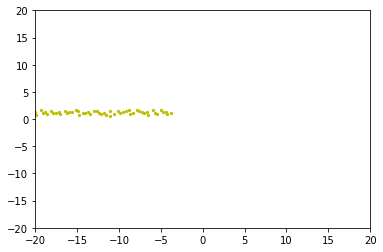

In [1]:
import numpy as np
import os
os.chdir("../")
from models.decompose_models import PCA

k, b = 3, 4
x = np.linspace(0, 10, 100)
y = x * k + b
x += np.random.normal(scale=0.3, size=x.shape)
data = np.c_[x, y]

model = PCA()
model.fit(data)
model.draw(data)